
<h2 style="color:Crimson;">OUTLINE</h2>

- **Data Understanding** 
    - Overview of the data
- **Clustering**
    - K-Means Clustering
      - Silhouette Score
      - Elbow Method
    - Gaussian Mixture Models
    - DBSCAN
- **Resources**

In [2]:
# Importing libraries needed.
# Typical libraries for data analysis
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Libraries needed for training the clustering algorithms
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture as GMM
from sklearn.cluster import DBSCAN
from sklearn import cluster
from scipy.spatial.distance import cdist

# Libraries for additional functions and metrics: 
from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples, rand_score, adjusted_rand_score
from sklearn.neighbors import NearestNeighbors

# Needed for normalisation
from sklearn import preprocessing
from sklearn.decomposition import PCA

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")


<h2 style="color:Crimson;">Clustering</h2>
<hr style="border:2px solid black"> </hr>

- Clustering data can **identify groups** of similar data points within a dataset.


<h2 style="color:Crimson;">Data Understanding</h2>
<hr style="border:2px solid black"> </hr>
Data are sourced from UCI machine learning repository (https://archive.ics.uci.edu/ml/datasets/seeds),
originally by: M. Charytanowicz, J. Niewczas, P. Kulczycki, P.A. Kowalski, S. Lukasik, S. Zak in ‘A Complete
Gradient Clustering Algorithm for Features Analysis of X-ray Images’, in: Information Technologies in
Biomedicine, Ewa Pietka, Jacek Kawa (eds.), Springer-Verlag, Berlin-Heidelberg, 2010, pp. 15-24. 

In [3]:
#Read the data
seeds = pd.read_csv('seeds.csv')
seeds.head()

,area,perimeter,compactness,length,width,asymmetry,groove_length
0,15.26,14.84,0.871,5.763,3.312,2.221,5.220
1,14.88,14.57,0.881,5.554,3.333,1.018,4.956
2,14.29,14.09,0.905,5.291,3.337,2.699,4.825
3,13.84,13.94,0.895,5.324,3.379,2.259,4.805
4,16.14,14.99,0.903,5.658,3.562,1.355,5.175


#### Description-

**Reading the csv file named 'seeds.csv' into a Pandas DataFrame and display the first five rows using the head() method.**


In [5]:
seeds.tail()

,area,perimeter,compactness,length,width,asymmetry,groove_length
205,12.19,13.20,0.878,5.137,2.981,3.631,4.870
206,11.23,12.88,0.851,5.140,2.795,4.325,5.003
207,13.20,13.66,0.888,5.236,3.232,8.315,5.056
208,11.84,13.21,0.852,5.175,2.836,3.598,5.044
209,12.30,13.34,0.868,5.243,2.974,5.637,5.063


#### Description-
**seeds.tail() displays the last five rows of the DataFrame.**

In [7]:
seeds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area           210 non-null    float64
 1   perimeter      210 non-null    float64
 2   compactness    210 non-null    float64
 3   length         210 non-null    float64
 4   width          210 non-null    float64
 5   asymmetry      210 non-null    float64
 6   groove_length  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


In [8]:
seeds.describe()

,area,perimeter,compactness,length,width,asymmetry,groove_length
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.871000,5.628533,3.258605,3.700200,5.408071
std,2.909699,1.305959,0.023594,0.443063,0.377714,1.503559,0.491480
min,10.590000,12.410000,0.808000,4.899000,2.630000,0.765000,4.519000
25%,12.270000,13.450000,0.857250,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873500,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887750,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918000,6.675000,4.033000,8.456000,6.550000


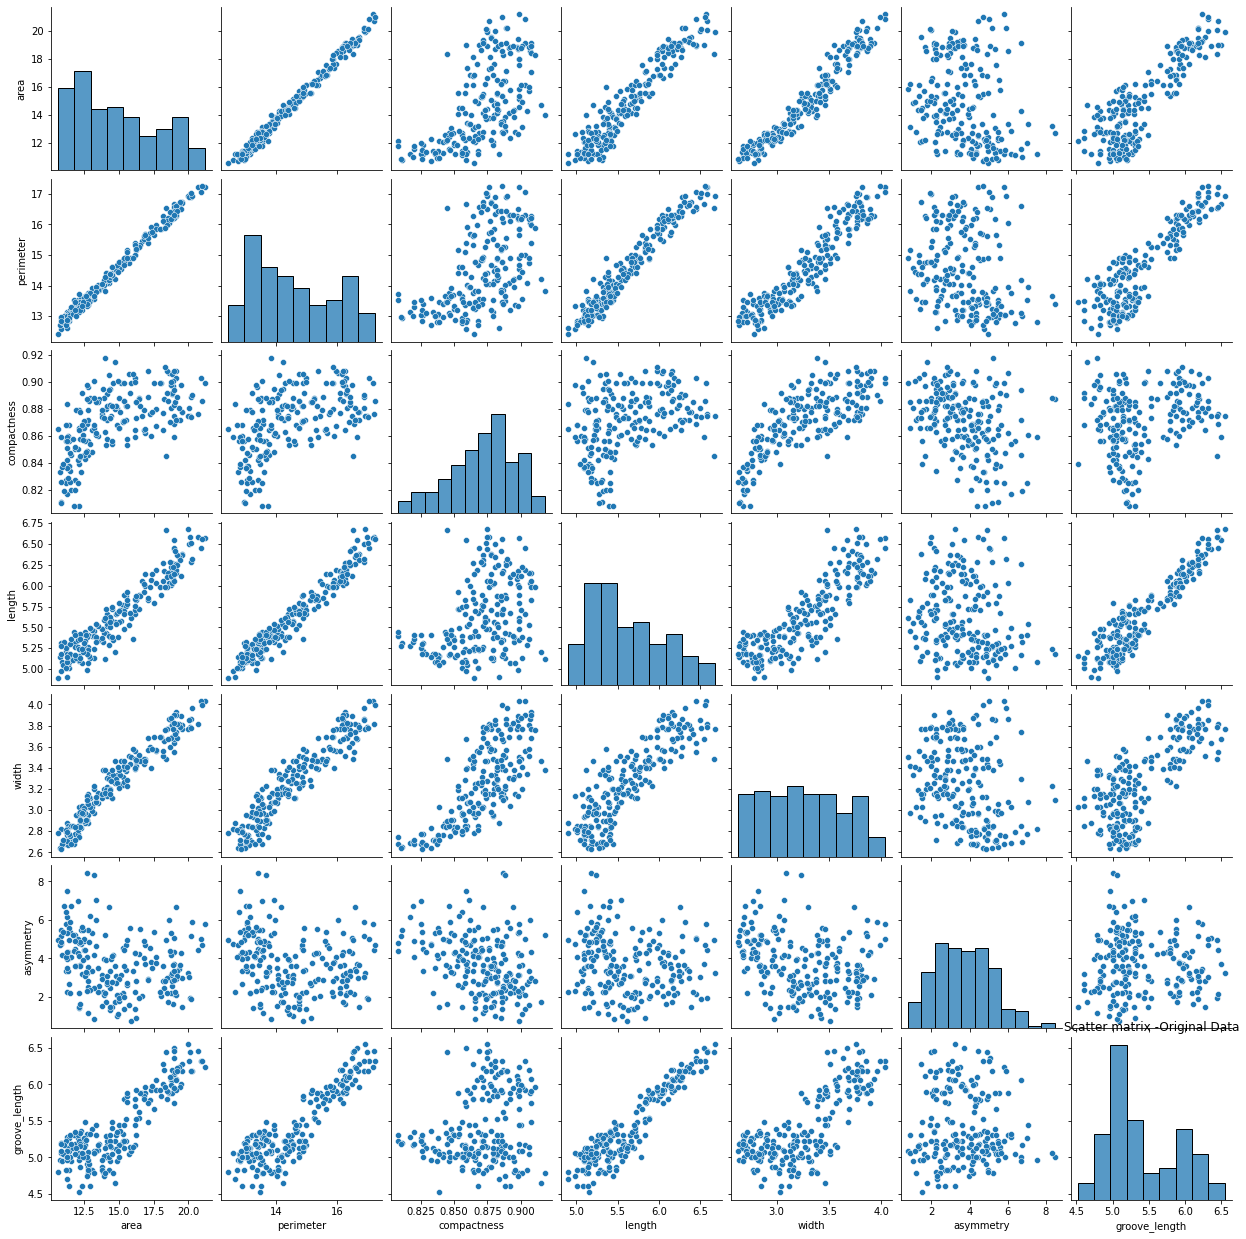

In [9]:
#Scatter matrix
sns.pairplot(seeds)
plt.title ("Scatter matrix -Original Data")
plt.show()
#SOURCE-P09_Clustering

#### Description-
**We use Seaborn to visualise a scatter matrix to better understand the distribution of the seeds dataset.**

We conduct some preliminary analysis of this plot: 
1. Since most attributes are distributed unevenly, it is challenging to categorise data points into different groups.
2. "Width" does not aid in group distinction because of its extremely even distribution.
3. The subplots in the figure's bottom row exhibit distinct cluster groupings. As a result, it may be claimed that "groove length" is a crucial characteristic for clustering.
4. Although it is not as effective as "groove length," the "asymmetry" characteristic is nonetheless helpful for grouping.

**A pairplot is a grid of plots that allows you to visualize the relationship between multiple variables in a dataset. Each plot in the grid represents a pair of variables (area, perimeter, length,width,compactness,etc.), and the plots are arranged such that the variables in each row are paired with the variables in each column.**



(8.0, 0.0)

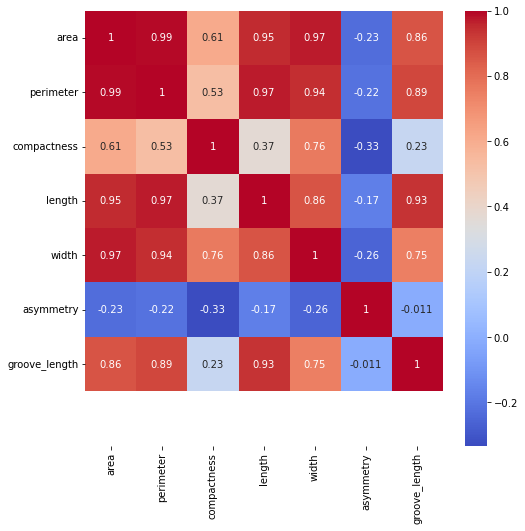

In [10]:
plt.figure(figsize=(8,8))
cor=seeds.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm')
plt.ylim(8,0)
#SOURCE-P09_Clustering

#### Description-
**A heatmap of the correlations between the variables in the seeds DataFrame. 
The corr() method is used to compute the pairwise correlations between the variables, and the resulting correlation matrix is passed to the heatmap function. The annot argument is set to True to display the values of the correlations on the heatmap. The cmap argument is set to 'coolwarm' to specify the color map used to color the heatmap. The ylim method is used to set the y-axis limits of the plot.**

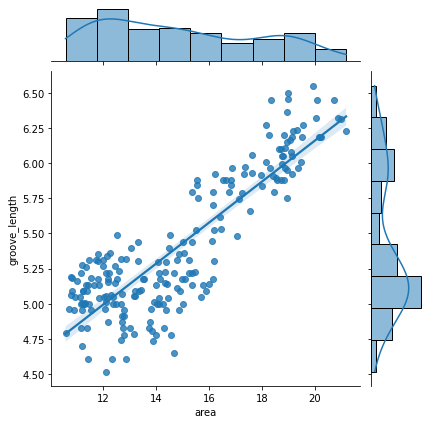

In [13]:
sns.jointplot(x='area', y='groove_length', data = seeds, kind='reg')
#SOURCE-P09_Clustering

#### Description-
**The x and y arguments specify the variables to be plotted on the x-axis and y-axis, respectively. The data argument specifies the data frame containing the variables. The kind argument specifies the type of plot to use for the relationship between the variables. The value 'reg' specifies that a regression plot should be used.
It creates a scatter plot of the 'area' and 'groove_length' variables, with a regression line showing the linear relationship between the two variables. The plot will also display the distribution of each variable as histograms on the margins of the plot.**

### Applying PCA  on seeds data

In [4]:
# Applying PCA on data
seeds_pca = PCA(n_components=2)
seeds_pca_df = pd.DataFrame(data=seeds_pca.fit_transform(seeds), columns=['PCA1', 'PCA2'])
#SOURCE-P09_Clustering


#### Description-
**It performs principal component analysis (PCA) on a dataset called seeds and stores the resulting principal components in a new dataframe called seeds_pca_df.**

In [17]:
seeds_pca_df

,PCA1,PCA2
0,0.663448,-1.417320
1,0.315666,-2.689228
2,-0.660499,-1.131506
3,-1.055278,-1.621188
4,1.619997,-2.183382
...,...,...
205,-3.041874,-0.473125
206,-4.109063,0.109342
207,-2.500036,4.307966
208,-3.332079,-0.525289


#### Description- 
**The seeds_pca_df dataframe contains the resulting principal components, which are stored in two columns: PCA1 and PCA2. These columns represent the first two principal components of the data.**

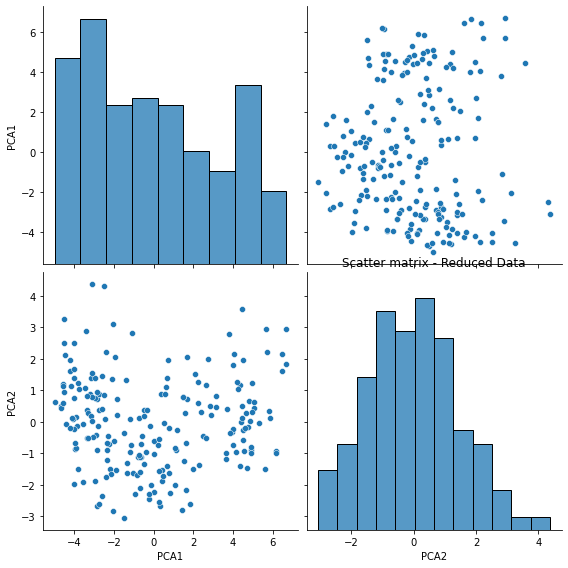

In [16]:
# Scatter matrix of seeds data
sns.pairplot(seeds_pca_df,height=4);
plt.title ("Scatter matrix - Reduced Data")
plt.show();
#SOURCE-P09_Clustering

#### Description-
We run PCA on the dataset to gain a sense of how the data appears in a 2D space. By altering and manipulating the cluster centres we obtain from clustering techniques, this will also be utilised to visualise clusters in two dimensions.

We can infer the following from the given graph: 
1. There are roughly 3–4 clusters in 2D

2. Because the density of data points in 2D does not vary significantly, the "DBScan" approach would not be appropriate here.

Therefore, to perform our clutering analysis, we will employ **KMeans** and **Gaussian Mixtures**. 
Although the graph shows 3–4 clusters in 2 dimensions, we will test models with variable numbers of clusters, namely 2–10 clusters. This  is because the 2 dimensional representation of the data using PCA is just an approximation and there might be higher dimensional relationships or groupings that we can potentially miss.
**The resulting plot is a matrix of scatter plots, with the variables on the x-axis (PCA1,PCA2,db_clusters) and y-axis (PCA1,PCA2,db_clusters) of each plot. The diagonal of the matrix  contains histograms showing the distribution of each variable.**

<h2 style="color:Crimson;"> Visualising Clustering</h2>
<hr style="border:2px solid black"> </hr>

- Applying the **K-means** ,**Gaussian Mixture** and **DBSCAN** clustering algorithms from `sklearn` to the dataset under the following conditions:
    - Visualising the behaviour of the different clusters sets

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">K-means Clustering</h2>

- The K-means algorithm searches for a **predetermined** number of clusters, $k$, within an unlabelled, multi-dimensional dataset.


- Follows a simple conception of what an "optimal" cluster might look like:
    - The *cluster center* is the arithmetic mean of all the points belonging to the cluster.
    - Each point is closer to its own cluster than to other cluster centers.


- This is a very popular clustering algorithm, given its **simplicity**.
    - It aligns with our intuitive mental logic, providing solutions that can be inferred by eye.
    

<hr style="border:2px solid black"> </hr>

#### Silhouette Score

- The silhouette score is the mean silhouette over all the instances in the data.


- Given:
    - $a$, the mean distance to other instances in the same cluster (*mean intracluster distance*)
    - $b$, the mean distance to the instances of the next closest cluster (the one that minimises $b$; *mean nearest-cluster distance*)


- We can calculate the silhouette coefficient, $C_S$:
    $$C_S = \frac{b-a}{max(a,b)}$$


- Values vary in the range [-1,1].
    - Values near $+1$ tell us that the instance is well inside its own cluster and **far away from neighbouring clusters**.
    - Values near $0$ tell us that the instance is near a **cluster boundary**.
    - Values near $-1$ tell us that the instance might be assigned to the **wrong cluster**.

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 0 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2
 1 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 2 2 2 2 2 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
Silhouette Coefficient for the seeds Dataset Clusters: 0.47


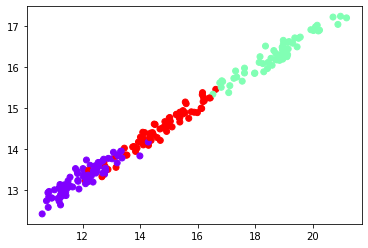

In [5]:

import matplotlib.pyplot as plt

# Setting the independent features (input)
X = seeds.values
seeds_kmeans = KMeans(n_clusters=3)
seeds_kmeans.fit(X)
# Predicting the cluster labels
labels = seeds_kmeans.predict(X)
print(labels)
# Finding the final centroids
centroids = seeds_kmeans.cluster_centers_
# Evaluating the quality of clusters
s = metrics.silhouette_score(X, labels, metric='euclidean')
print(f"Silhouette Coefficient for the seeds Dataset Clusters: {s:.2f}")
# plotting the clusters using sepal_length and sepal_width
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.show()
##### SOURCE-P09_Clustering

In [6]:
# Import the library to calculate the silhouette score
from sklearn.metrics import silhouette_score

# List to store the metric value given different K values
C_S = []

# Range of the different values of K to analyse
K = range(2,10)

# Iterate over K
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    C_S.append(silhouette_score(X, kmeans.labels_))
    
C_S

[0.5182872681161963,
 0.47193375399373283,
 0.41252808179415285,
 0.3613235002464241,
 0.3686658643061236,
 0.35246501610494146,
 0.3616385954326866,
 0.35774700832603623]

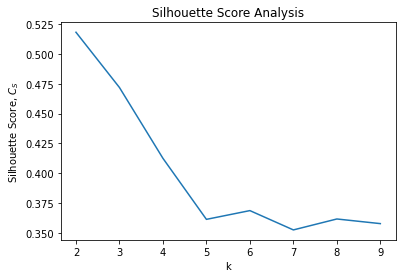

In [7]:
# Plot the Silhouette Score as a funtion of k 
plt.plot(K, C_S)
plt.xlabel('k')
plt.ylabel(r'Silhouette Score, $C_S$')
plt.title('Silhouette Score Analysis')
plt.show()

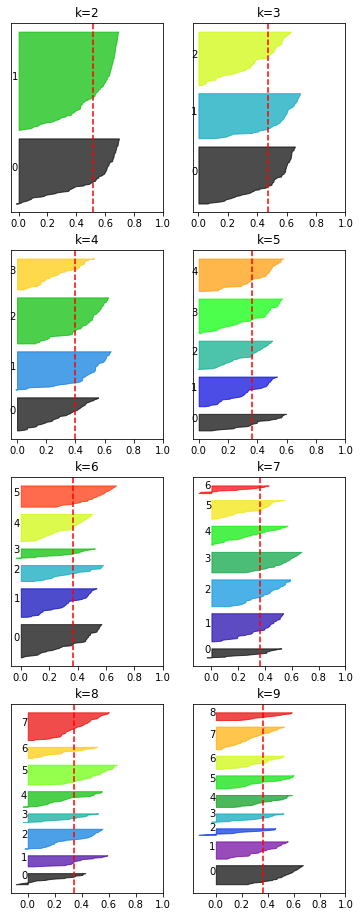

In [8]:
# We can plot individual contributions to the mean within each cluster.

# Bad cluster number choices are associated with a low mean silhouette score and large variations in 
# the size of the cluster segments in these plots.

import matplotlib.cm as cm
import numpy as np

# Import the library to calculate the silhouette samples
from sklearn.metrics import silhouette_samples

# List to store the metric value given different K values
C_S = []

# Range of the different values of K to analyse
K = range(2,10)

# Iterate over K
fig, axs = plt.subplots(4,2, figsize=(6, 4*4))
axs = axs.flatten()
for k in K:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    values = silhouette_samples(X, kmeans.labels_)
    silhouette_avg = silhouette_score(X, kmeans.labels_)
    
    y_lower = 10
    for i in range(k):
        ith_values = values[kmeans.labels_ == i]
        ith_values.sort()
        
        szi = ith_values.shape[0]
        y_upper = y_lower + szi
        
        color = cm.nipy_spectral(float(i) / k)
        
        axs[k-2].fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        axs[k-2].text(-0.05, y_lower + 0.5 * szi, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
        
    axs[k-2].set_title(f'k={k}')
    axs[k-2].axvline(x=silhouette_avg, color="red", linestyle="--")

    axs[k-2].set_yticks([])  # Clear the yaxis labels / ticks
    axs[k-2].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])    

    
    
    


#### Description-
- A perfect score is $1.0$.
- A poor match will be negative (`adjusted_rand_score`) or near $0$.
- The `adjusted_rand_score` corrects for chance of random labelling.
- No assumptions are made regarding the structure of the clustering and the exact labels.
    - It tests multiple permutations of possible integer labels.


##### SOURCE-P09_Clustering

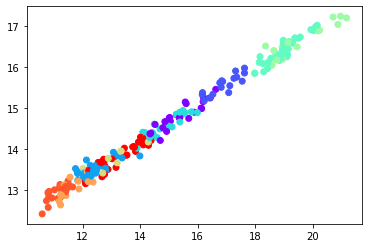

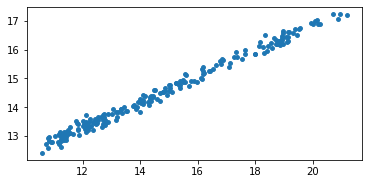

In [58]:
# plotting the clusters 
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.show()

plt.scatter(X[:, 0], X[:, 1], s=15)
plt.gca().set_aspect('equal')  ## Force x and y scaling to be the same (isotropic)
#####SOURCE-P09_Clustering

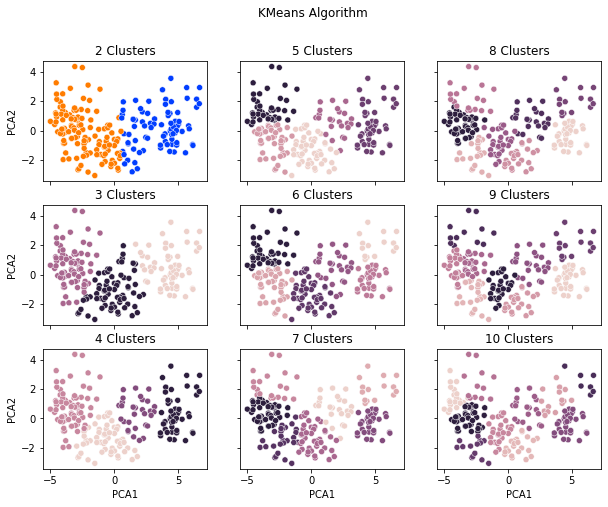

In [21]:
# KMeans
for i in range(2, 11):
    kmeans = cluster.KMeans(n_clusters=i)
    seeds_pca_df[f'{i}_clusters_kmeans'] = kmeans.fit_predict(seeds)

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 7.5))
for nrow in range(3):
    for ncol in range(3):
        n_clusters = 3*ncol + nrow + 2
        sns.set_palette('bright', n_colors=n_clusters)
        sns.scatterplot(data = seeds_pca_df, x='PCA1', y='PCA2', ax=axes[nrow, ncol], hue=f'{n_clusters}_clusters_kmeans')
        axes[nrow, ncol].set_title(f"{n_clusters} Clusters")
        axes[nrow, ncol].legend([],[], frameon=False)
plt.suptitle("KMeans Algorithm");
#####SOURCE-P09_Clustering

#### Description - 
According to the graph above, **n clusters = [2, 3. 4]**. The sizes of each cluster are substantial.

1. Every cluster easily surpasses the silhouette score on a scale of 1 to 10.

2. n clusters = 5 - Although not all of the clusters are exactly the same size, the majority of them are.

3. The average silhouette score is easily exceeded by all of the clusters. The clusters have some low silhouette scores, but       not enough to throw out the model.

All of the clusters easily cross the average silhouette score (n clusters = 6); the cluster sizes are unequal but not enough to discard the model; and some of the clusters [0, 4] have negative silhouette scores but not enough to do so.

<hr style="border:1px solid black"> </hr>

#### Elbow method

- The objective is to analyse the behaviour of the **inertia** of the cluster set.
    - Mean of the sum of the squared distances between each point and its centroid
    

- As $k$ increases, the inertia tends toward $0$.
    - With the number of centroids equal to the number of data points, the distance is zero.
    

- **Find the number of clusters above which the change in inertia begins to slow.**
    - Use **`.inertia_`**.

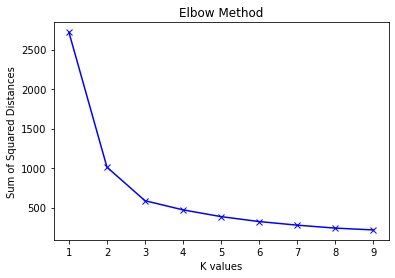

In [22]:
# Arbitrarily selecting a range of values for K
K = range(1,10)
sum_of_squared_distances = []
# Using Scikit Learn’s KMeans Algorithm to find sum of squared distances
for k in K:
    model = KMeans(n_clusters=k).fit(X)
    sum_of_squared_distances.append(model.inertia_)
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('K values')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method')
plt.show()
#####SOURCE-P09_Clustering

#### Description-
From this graph we see that the optimal tradeoff is achieved when `n_clusters = 3`. 

Hence we conclude that **n_clusters = 3** is optimal number of clusters for this dataset when we do `KMeans` clustering.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Gaussian Mixture Models</h2>

- **Gaussian Mixture Models (GMM)** provide a way of representing datasets where the observations might have been sampled from a combination of multiple underlying probability distributions.  
- In a *general* mixture model, the distribution of a variable is defined as a combination of multiple probability densities (typically of the same kind):
$$p(x)=w_1p_1(x|\theta_1)+w_2p_2(x|\theta_2)+\ldots+w_mp_m(x|\theta_m)$$
where $\sum_{i=1}^{m} w_i= 1$.
- In a *Gaussian* mixture model, each component, $i$, of the mixture follows a normal distribution with varying mean and standard deviation parameters, $\theta_i$.
- GMMs can be used to learn clusterings of the data by fitting a mixture with a certain number of components to the observations.
   

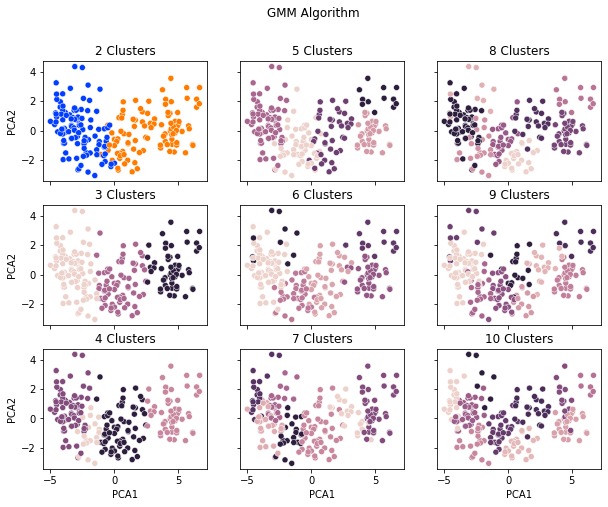

In [23]:
# GMMs
from sklearn.mixture import GaussianMixture

for i in range(2, 11):
    gmm = GaussianMixture(n_components=i)
    seeds_pca_df[f'{i}_clusters_gmm'] = gmm.fit_predict(seeds)

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True, figsize=(10, 7.5))
for nrow in range(3):
    for ncol in range(3):
        n_clusters = 3*ncol + nrow + 2
        sns.set_palette('bright', n_colors=n_clusters)
        sns.scatterplot(data =seeds_pca_df, x='PCA1', y='PCA2', ax=axes[nrow, ncol], hue=f'{n_clusters}_clusters_gmm')
        axes[nrow, ncol].set_title(f"{n_clusters} Clusters")
        axes[nrow, ncol].legend([],[], frameon=False)
plt.suptitle("GMM Algorithm");
#####SOURCE-P09_Clustering

#### Description-
- Each cluster's size is substantial and somewhat even; n clusters = [2, 3, 4] With **n clusters = 5**, all of the clusters significantly surpass the average silhouette score.
- Although not all of the cluster sizes are perfectly even, most of them are about the same size. The average silhouette score is significantly exceeded by all of the clusters; *Cluster 3* has some negative silhouette scores, but not enough to invalidate the model.
n clusters is set to six.
- Although the cluster sizes vary, this does not render the model useless. The average silhouette score is easily exceeded by all of the clusters; clusters [0, 4] contain some negative silhouette scores, but not enough to dismiss the model; n clusters = 7.
- *Cluster 1* has some negative silhouette scores, but not enough to discard the model. - Cluster sizes are inconsistent enough to discard the model.

In [24]:
# Inspect the probabilistic cluster assignments

probs = gmm.predict_proba(X)

# Returns (n_samples, n_clusters) measuring the probability
# that any point belongs to the given cluster.

probs.shape
#####SOURCE-P09_Clustering

(210, 10)

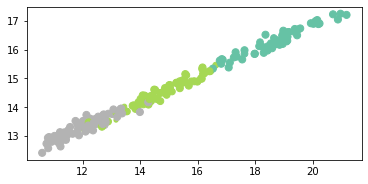

In [25]:
# Visualise the probabilities

psize = 50 * probs.max(axis=1)**3  # cube to emphasize probability differences

plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set2', s=psize)
plt.gca().set_aspect('equal')
#####SOURCE-P09_Clustering

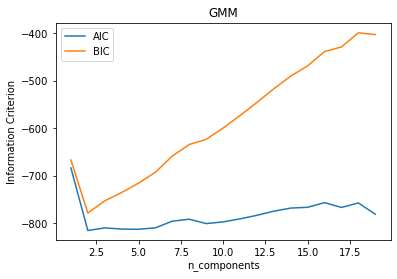

In [11]:
# Plot AIC and BIC values for the GMM.

n_components = range(1, 20)

models = [GMM(n, covariance_type='full', random_state=0).fit(seeds[['groove_length', 'compactness']])
          for n in n_components]

plt.plot(n_components, [m.aic(seeds[['groove_length', 'compactness']])
         for m in models], label='AIC')
plt.plot(n_components, [m.bic(seeds[['groove_length', 'compactness']])
         for m in models], label='BIC')
plt.title('GMM')
plt.ylabel('Information Criterion')
plt.xlabel('n_components')
plt.legend()

#### Description-
**The AIC and BIC are measures of the quality of a statistical model. Both criteria balance the fit of the model to the data with the number of parameters in the model, with the goal of finding the model that best balances these two competing considerations. The AIC and BIC can be used to compare different models and choose the one that best fits the data.
the GMM is fit to the dataset of seeds using fit method, with the number of components ranging from 1 to 20. The AIC and BIC of each model are computed using the aic and bic methods, respectively.**

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">DBSCAN</h2>

- DBSCAN: Density-Based Spatial Clustering of Applications with Noise


- Works by grouping together data points by those with great **density** in their neighbourhoods, separated by sparse regions.


- Method identifies noise (if this is of interest, e.g., maybe to be removed from the dataset) and can "see through it" to identify clusters.


- Good at finding clusters of an **arbitrary shape**.


- DBSCAN defines the radius of a neighbourhood with the user-specified $\epsilon$ (`eps`) parameter and the `min_samples` parameter, which specifies the density threshold of dense regions. 

In [48]:
from sklearn.cluster import DBSCAN

#Create a DBSCAN model
dbscan = DBSCAN()

#Fit the model to the data
dbscan.fit(seeds)

#Get the cluster labels for each point
labels = dbscan.labels_
#####SOURCE-P09_Clustering

In [49]:

# Setting the independent features (input)
X = seeds.values
seeds_dbscan = DBSCAN(eps=1, min_samples=10)
seeds_dbscan.fit(X)
labels = seeds_dbscan.labels_
# label=-1 means the point is an outlier. Rest of the values represent the label/cluster number starting from 0
print(labels)
# Creating a numpy array with all values set to false by default
core_samples_mask = np.zeros_like(labels, dtype=bool)
# Setting core and border points (all points that are not -1) to True
core_samples_mask[seeds_dbscan.core_sample_indices_] = True
# Finding the number of clusters in labels (ignoring noise if present)
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)
# Printing the number of clusters and number of noise points (outliers)
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
# Evaluating the quality of clusters
s = metrics.silhouette_score(X, seeds_dbscan.labels_)
print(f"Silhouette Coefficient for the seeds Dataset Clusters: {s:.2f}")
#####SOURCE-P09_Clustering

[ 0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0 -1  0  0  0  0  0  0 -1
  0 -1  0  0  0  0 -1  0  0  0  0  0  0 -1  0 -1  0  0  0 -1  0  0  0  0
  0  0  0 -1  0  0  0  0  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  1  2
  2  1  2  2  1 -1 -1  2 -1 -1 -1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1  2
  1  1  1  1  2  1  1  1  1  1  1  1  1  1  1  1  1 -1 -1  1  1  1  1  1
 -1  1  2  1 -1  1  1  1 -1 -1  1  1 -1  2 -1  0  1  0  0  2  0 -1  0  0
  0  0 -1  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0 -1  0  0  0
  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0 -1  0  0]
Estimated number of clusters: 3
Estimated number of noise points: 37
Silhouette Coefficient for the seeds Dataset Clusters: 0.21


Estimated number of clusters: 3


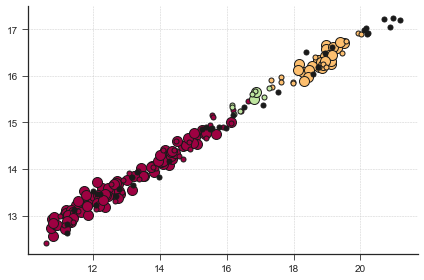

In [50]:
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0, 1, len(unique_labels)))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise
        col = 'k'
    
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=10)
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
    markeredgecolor='k', markersize=5)
print("Estimated number of clusters: %d" % n_clusters_)
plt.show()
#####SOURCE-P09_Clustering

[0.11736269 0.11736269 0.13385813 0.13385813 0.13580133 0.13580133
 0.17900559 0.17900559 0.19143667 0.19143667 0.20600243 0.20600243
 0.2075789  0.2075789  0.21165774 0.21165774 0.21200708 0.21200708
 0.21648787 0.21749023 0.21749023 0.22005454 0.22005454 0.22458183
 0.22458183 0.22469312 0.22469312 0.22497778 0.22497778 0.22616808
 0.22616808 0.22735655 0.22735655 0.23768677 0.23768677 0.23797899
 0.23797899 0.24577836 0.24700607 0.24700607 0.24800202 0.24800202
 0.25307311 0.25681706 0.25681706 0.25831376 0.25831376 0.25856721
 0.25917176 0.26246714 0.26246714 0.26913751 0.26913751 0.27168364
 0.27168364 0.28493508 0.28514908 0.28514908 0.28581463 0.28581463
 0.28731864 0.28731864 0.29034807 0.29923402 0.29923402 0.30077068
 0.30077068 0.30447824 0.30631846 0.30631846 0.30777427 0.30788634
 0.31268834 0.31367977 0.31545206 0.31545206 0.31599842 0.32226387
 0.32359543 0.32493076 0.32901368 0.33461769 0.33461769 0.33664967
 0.34038948 0.34038948 0.3439026  0.35018424 0.35018424 0.3508

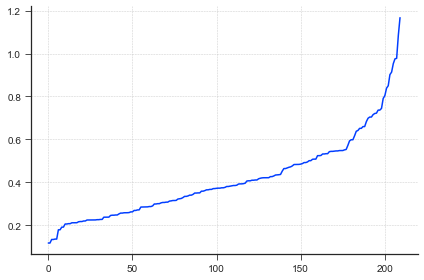

In [51]:
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=5)
nearest_neighbors.fit(X)
distances, indices = nearest_neighbors.kneighbors(X)
distances = np.sort(distances, axis=0)[:, 1]
print(distances)
plt.plot(distances)
plt.show()
#####SOURCE-P09_Clustering

Estimated no. of clusters: 3
Estimated no. of noise points: 37


Text(0.5, 1.0, 'DBSCAN')

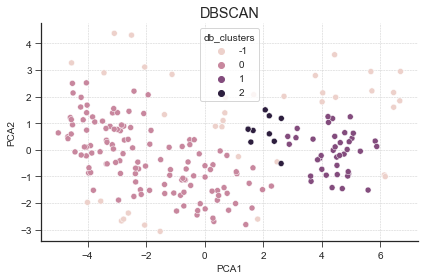

In [52]:
eps = 1.0
min_samples = 10

# Initialise and fit DBSCAN
db = cluster.DBSCAN(eps=eps, min_samples=min_samples).fit(seeds)
# Print the number of clusters
seeds_pca_df['db_clusters'] = db.labels_

n_clusters = len(np.unique(labels[labels >= 0]))
n_noise = np.sum(np.array(labels) == -1, axis=0)
print('Estimated no. of clusters: %d' % n_clusters)
print('Estimated no. of noise points: %d' % n_noise)

# Plot the DBSCAN clusters data
sns.set_palette('bright', n_colors=n_clusters)
sns.scatterplot(data = seeds_pca_df, x='PCA1', y='PCA2', hue=f'db_clusters')
plt.title(f"DBSCAN")
#####SOURCE-P09_Clustering

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Discussion</h2>

- Clustering algorithms are part of unsupervised machine learning.
- They identify groups of data points depending on their characteristics.

**The performance of GMM is better than that of K-means. The three clusters in GMM plot are closer to the original ones. Also, we compute the error rate (percentage of misclassified points) which should be the smaller the better.
GMM uses a probabilistic assignment of data points to clusters. Each cluster is described by a separate Gaussian distribution.
Data from a Gaussian mixture model tend to fall into elliptical (or spherical) clumps.**

This can be viewed as an extension on K-means ideas, which do not consider probability and can often be too simple for many applications. K-means does not allow us to assess the chance that it got the answer correct (e.g., in areas where the clusters are very near and their circles of influence overlap).

In k-Means-

The global optimal result might not be achieved (the end result can be affected by the random choice of the initial definition). 
- The number of clusters must be selected beforehand.
    - It we ask the model to find 8 clusters, it will.
- Solution is limited to the cluster boundaries, which will always be **linear**.
    - Not good for clustering data with complex (curved) geometries.      
- K-means can be slow for a large number of samples.


**K-means** is known for its simplicity and considers the distances between centroids and data points to define cluster membership.
    - The **Elbow Method** and **Silhouette Scores** are two approaches to define the optimal number of clusters.
**Gaussian Mixture Models** represent the data by combining multiple probabilistic distributions.
    - The **AIC** and **BIC** are two metrics that can be used to define the optimal number of clusters.
**DBSCAN** identifies clusters based on neighbourhood density.
    - The number of clusters is not specified in advance.
    - Care must be taken in choosing parameter values.
    -Similar to the *elbow* method for K-means, DBSCAN users often rely on the **knee** method.

<hr style="border:2px solid black"> </hr>
<h2 style="color:Crimson;">Additional Resources</h2>

VanderPlas, Jake (2016). Python Data Science Handbook. O'Reilly Media, Inc. ISBN: 9781491912058. **Chapter 5**.

Han, Jiawei, M. Kamber, and J. Pei (2012) Data Mining, Concepts and Techniques, 3rd Edition. Elsevier Inc. ISBN 978-0-12-381479-1. **Chapters 10-11**.

Bishop, Christopher (2006) Pattern Recognition and Machine Learning. Springer Science+Business Media, LLC. ISBN 978-0387-31073-2. **Chapter 9**.

`sklearn` performance metrics: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation
